<a href="https://colab.research.google.com/github/ferrysany/Assignment-1/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CUNY 604 2021 Summer Project - Chun San Yip

Procurement Process Simulation

In [133]:
# download modsim.py if necessary

try:
    import pint
except ImportError:
    !pip install pint
    import pint
    
try:
    from modsim import *
except ImportError:
    !pip install modsimpy
    from modsim import *

In [3]:
# import functions from modsim

from modsim import *
import matplotlib.pyplot as plt

This project is build on the top of the customer check out example of Allen Downey 

The team has 5 buyers

The average number of Purchase Order per week is about 60.

The estimated process time for each Purchase Orders is 6 to 8 hours.

In [78]:
""" This function is to generate a system
lam is the incoming rate
mu is the process rate
duration is the simulation time (5 days or 2400 minutes)
"""

def PO_system(lam, mu, n):
      
  return System(lam=lam, mu=mu, n=n, duration=2400)

In [79]:
""" As day is the unit of the simulation
As there are 60 Purchase Order per 5 days or there are 12 Purchase Order per day
or 1 Purchase Order every 0.667 hours
The service time is about 6 hours """

interarrival_time = 40
service_time = 360

lam = 1/interarrival_time
mu = 1/service_time
n=5

system = PO_system(lam=lam, mu=mu, n=n)
system

System(duration=2400, lam=0.025, mu=0.002777777777777778, n=5)

In [129]:
""" 
x - the total number of Purchase Orders in the queue, including the Purchase 
    Orders being processed
t - the number of minutes that have elapsed in the simulation
Only 1 queue for this update function
n - number of buyer
If all buyers are busy, check whether the last is complete
"""

def update_func_one(x, t, system):

  for i in reversed(range(system.n)):   
          
    if x > i-1:
      if flip(system.mu):
        x -= 1
  
  if flip(system.lam):
    x += 1

  return x

In [130]:
def run_simulation(system, update_func_one):
    """Simulate a queueing system.
    
    system: System object
    update_func_one: function object
    """
    x = 0
    results = TimeSeries()
    results[0] = x
    
    for t in linrange(0, system.duration):
        x = update_func_one(x, t, system)
        results[t+1] = x

    return results


In [141]:
def multiple_buyer(n): 

  for i in range(n):
    system = PO_system(lam=lam, mu=mu, n=(i+1))
    results = run_simulation(system, update_func_one)
    results.plot(label=str(i+1)+' Buyers')

  decorate(title='Purchase Order Processing',
            xlabel='Time (mins)',
            ylabel='Number of Purchase Order in the Queue')

  return

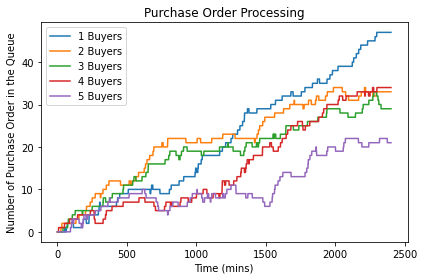

In [143]:
multiple_buyer(5)

The larger number of buyer, the lower the number of Purchase Order in the queue.
It makes sense as more buyers work on the Purchase Order.

After the simulation, I also want to make use of Little's Law to find out the time Purchase Order is pending in the queue, W
We can compute L, which is the average number of Purchse Order in the system,
L=λW

Where λ is the arrival rate. Here's a function that computes them.
